# 🧹 Step 2: Cleaning Article Text
This notebook cleans raw article content for further analysis.

In [27]:
import pandas as pd
import re
import matplotlib.pyplot as plt


def clean_article_text(text):
    """Cleans boilerplate and extra whitespace from article content."""
    if not isinstance(text, str):
        return ""
    text = re.sub(
        r"Sign up for our.*?newsletter", "", text, flags=re.IGNORECASE | re.DOTALL
    )
    text = re.sub(r"Read More.*?\n", "", text, flags=re.IGNORECASE)
    text = re.sub(r"\n+", "\n", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text.strip()


def apply_cleaning(df):
    """Apply text cleaning to a DataFrame of articles."""
    df["cleaned_content"] = df["content"].apply(clean_article_text)
    return df

In [28]:
df = pd.read_csv("../data/raw/betterdwelling_articles.csv")
df_cleaned = apply_cleaning(df)
df_cleaned[["title", "cleaned_content"]].head()
df_cleaned.to_csv("../data/processed/cleaned_articles.csv", index=False)

In [41]:
import json
import sys
import os

sys.path.append(os.path.abspath(".."))

# Content for 03_eda.ipynb
eda_notebook = {
    "cells": [
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": [
                "# 📊 Step 3: Exploratory Data Analysis (EDA)\n",
                "Explore word frequency, sentiment, and patterns in cleaned housing articles.",
            ],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "import pandas as pd\n",
                "import matplotlib.pyplot as plt\n",
                "from collections import Counter\n",
                "from wordcloud import WordCloud\n",
                "from textblob import TextBlob\n",
                "import seaborn as sns\n",
                "import re\n",
                "\n",
                "# Load cleaned data\n",
                'df = pd.read_csv("../data/processed/cleaned_articles.csv")',
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 🔠 Word Frequency (Top 30 Words)"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Combine all content\n",
                "text = \" \".join(df['cleaned_content'].dropna().tolist()).lower()\n",
                "text = re.sub(r'[^a-zA-Z\\s]', '', text)\n",
                "\n",
                "# Tokenize and count\n",
                "words = text.split()\n",
                "word_freq = Counter(words)\n",
                "common_words = word_freq.most_common(30)\n",
                "\n",
                "# Plot\n",
                "plt.figure(figsize=(12, 6))\n",
                "sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words])\n",
                'plt.title("Top 30 Most Common Words")\n',
                'plt.xlabel("Frequency")\n',
                'plt.ylabel("Word")\n',
                "plt.tight_layout()\n",
                "plt.show()",
            ],
        },
        {"cell_type": "markdown", "metadata": {}, "source": ["## ☁️ Word Cloud"]},
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)\n",
                "plt.figure(figsize=(10, 5))\n",
                "plt.imshow(wordcloud, interpolation='bilinear')\n",
                'plt.axis("off")\n',
                'plt.title("Word Cloud of Housing Articles")\n',
                "plt.show()",
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 😐 Sentiment Analysis (Polarity)"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Sentiment polarity per article\n",
                "df['sentiment'] = df['cleaned_content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)\n",
                "\n",
                "# Plot sentiment\n",
                "plt.figure(figsize=(10, 4))\n",
                "sns.histplot(df['sentiment'], bins=20, kde=True, color='skyblue')\n",
                'plt.title("Distribution of Sentiment in Articles")\n',
                'plt.xlabel("Polarity (-1 negative to +1 positive)")\n',
                'plt.ylabel("Article Count")\n',
                "plt.grid(True)\n",
                "plt.tight_layout()\n",
                "plt.show()",
            ],
        },
    ],
    "metadata": {
        "kernelspec": {
            "display_name": "Python 3",
            "language": "python",
            "name": "python3",
        },
        "language_info": {"name": "python", "version": "3.12"},
    },
    "nbformat": 4,
    "nbformat_minor": 2,
}

# Save the notebook
eda_path = "../notebooks/03_eda.ipynb"
with open(eda_path, "w") as f:
    json.dump(eda_notebook, f)

eda_path

'../notebooks/03_eda.ipynb'

In [42]:
# Generate a new notebook for price extraction from article content

price_extract_notebook = {
    "cells": [
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": [
                "# 💰 Step 4: Extract Housing Price Mentions\n",
                "Use regular expressions to identify price-related data like:\n",
                "- Dollar amounts (e.g., $850,000, CAD 1.2M)\n",
                "- Percent changes (e.g., -5%, +12%)",
            ],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "import pandas as pd\n",
                "import re\n",
                "\n",
                "# Load cleaned data\n",
                'df = pd.read_csv("../data/processed/cleaned_articles.csv")\n',
                "\n",
                "# Combine text from all articles (if needed)\n",
                "text = \" \".join(df['cleaned_content'].dropna().tolist())",
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 🧠 Define Regex Patterns"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Price patterns like $850,000 or CAD 1.2M\n",
                "price_pattern = r'(\\$|CAD\\s?)?\\d{1,3}(?:,\\d{3})*(?:\\.\\d+)?\\s?[MK]?'",
            ],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Percentage changes like -5%, +12%\n",
                "percent_pattern = r'[+-]?\\d{1,3}(?:\\.\\d+)?%'",
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 📥 Extract Price Mentions from Text"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "prices = re.findall(price_pattern, text)\n",
                "percents = re.findall(percent_pattern, text)\n",
                "\n",
                'print(f"Found {len(prices)} price mentions and {len(percents)} percent changes.")\n',
                'print("Sample prices:", prices[:10])\n',
                'print("Sample percents:", percents[:10])',
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 📊 Optional: Save Extracted Data"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Save to file if needed\n",
                "pd.DataFrame({'price_mentions': prices}).to_csv(\"../data/processed/price_mentions.csv\", index=False)\n",
                "pd.DataFrame({'percent_changes': percents}).to_csv(\"../data/processed/percent_changes.csv\", index=False)",
            ],
        },
    ],
    "metadata": {
        "kernelspec": {
            "display_name": "Python 3",
            "language": "python",
            "name": "python3",
        },
        "language_info": {"name": "python", "version": "3.12"},
    },
    "nbformat": 4,
    "nbformat_minor": 2,
}

# Save the notebook to the project structure
price_extract_path = "../notebooks/04_extract_prices.ipynb"
with open(price_extract_path, "w") as f:
    json.dump(price_extract_notebook, f)

price_extract_path

'../notebooks/04_extract_prices.ipynb'

In [44]:
import re

# Use improved regex
price_pattern = r"(?:(?:\$|CAD)\s?)?\d{1,3}(?:,\d{3})*(?:\.\d+)?\s?[MKk]?"
percent_pattern = r"[+-]?\d{1,3}(?:\.\d+)?%"

# Combine all text
text = " ".join(df["cleaned_content"].dropna().tolist())

# Run regex search
prices = re.findall(price_pattern, text)
percents = re.findall(percent_pattern, text)

In [45]:
print(f"Found {len(prices)} price mentions and {len(percents)} percent changes.")
print("Sample prices:", prices[:10])
print("Sample percents:", percents[:10])

Found 370 price mentions and 74 percent changes.
Sample prices: ['0.7', '$4,800', '$701,900 ', '3.6', '$26,100', '202', '1', '3.6', '202', '4']
Sample percents: ['0.7%', '3.6%', '3.6%', '17.6%', '-20%', '50%', '0.04%', '2.1%', '9.3%', '13.1%']


In [46]:
import os
import pandas as pd

# Ensure folder exists
os.makedirs("../data/processed", exist_ok=True)

# Save data
pd.DataFrame({"price_mentions": prices}).to_csv(
    "../data/processed/price_mentions.csv", index=False
)
pd.DataFrame({"percent_changes": percents}).to_csv(
    "../data/processed/percent_changes.csv", index=False
)

print("✅ Files saved.")

✅ Files saved.


In [47]:
def normalize_price(price_str):
    price_str = price_str.upper().replace("$", "").replace("CAD", "").strip()

    try:
        if "M" in price_str:
            return float(price_str.replace("M", "")) * 1_000_000
        elif "K" in price_str:
            return float(price_str.replace("K", "")) * 1_000
        else:
            return float(price_str.replace(",", ""))
    except ValueError:
        return None

In [48]:
df_prices = pd.DataFrame({"raw": prices})
df_prices["normalized"] = df_prices["raw"].apply(normalize_price)
df_prices = df_prices.dropna()
df_prices.head(10)

,raw,normalized
0,0.7,0.7
1,"$4,800",4800.0
2,"$701,900",701900.0
3,3.6,3.6
4,"$26,100",26100.0
5,202,202.0
6,1,1.0
7,3.6,3.6
8,202,202.0
9,4,4.0


In [49]:
df_prices.to_csv("../data/processed/normalized_prices.csv", index=False)
print("✅ Normalized prices saved.")

✅ Normalized prices saved.


In [51]:
# Generate a time-series forecasting notebook using Prophet
forecast_notebook = {
    "cells": [
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": [
                "# 🔮 Step 5: Time-Series Forecasting with Prophet\n",
                "Use Facebook Prophet to model and forecast housing price trends.",
            ],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "import pandas as pd\n",
                "from prophet import Prophet\n",
                "import matplotlib.pyplot as plt\n",
                "from datetime import datetime, timedelta\n",
                "import numpy as np\n",
                "\n",
                "# Load normalized prices (no timestamps yet)\n",
                'df = pd.read_csv("../data/processed/normalized_prices.csv")',
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 🕒 Simulate Monthly Timestamps (if not available)"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Simulate monthly timestamps evenly spaced in past 12 months\n",
                "num_points = len(df)\n",
                "start_date = datetime.today() - timedelta(days=30 * num_points)\n",
                "df['ds'] = [start_date + timedelta(days=30 * i) for i in range(num_points)]\n",
                "df['y'] = df['normalized']\n",
                "\n",
                "df[['ds', 'y']].tail()",
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 📈 Fit Prophet Model"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": ["model = Prophet()\n", "model.fit(df[['ds', 'y']])"],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 🔮 Forecast Future Prices"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Forecast next 12 months\n",
                "future = model.make_future_dataframe(periods=365, freq='D')\n",
                "forecast = model.predict(future)\n",
                "\n",
                "# Plot forecast\n",
                "model.plot(forecast)\n",
                'plt.title("Housing Price Forecast")\n',
                "plt.show()",
            ],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Components (trends, seasonality)\n",
                "model.plot_components(forecast)\n",
                "plt.show()",
            ],
        },
    ],
    "metadata": {
        "kernelspec": {
            "display_name": "Python 3",
            "language": "python",
            "name": "python3",
        },
        "language_info": {"name": "python", "version": "3.12"},
    },
    "nbformat": 4,
    "nbformat_minor": 2,
}

# Save the notebook
forecast_path = "../notebooks/05_forecast.ipynb"
with open(forecast_path, "w") as f:
    json.dump(forecast_notebook, f)

forecast_path

'../notebooks/05_forecast.ipynb'

In [56]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/13.3 MB 7.6 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/13.3 MB 10.7 MB/s eta 0:00:01
   ------------------ --------------------- 6.3/13.3 MB 11.7 MB/s eta 0:00:01
   ------------------ --------------------- 6.3/13.3 MB 11.7 MB/s eta 0:00:01
   -------------------------- ------------- 8.9/13.3 MB 8.5 MB/s eta 0:00:01
   --------------------------------- ------ 11.0/13.3 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/954.8 kB ? eta -:--:--
   --------------------------------------- 954.8/954.8 kB 22.3 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [importlib-resources]
   -------- ------------------------------- 1/5 [importlib-resources]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ---------------

In [58]:
print(df.columns)
df.head()

Index(['url', 'title', 'content', 'cleaned_content'], dtype='object')


,url,title,content,cleaned_content
0,https://betterdwelling.com/canadian-real-estat...,"Canadian Real Estate Prices Slip Sharply, Furt...",Weak demand for Canadian real estate continues...,Weak demand for Canadian real estate continues...
1,https://betterdwelling.com/canadian-real-estat...,Canadian Real Estate Prices Hit Multi-Month Hi...,Canadian real estate demand is nearing histori...,Canadian real estate demand is nearing histori...
2,https://betterdwelling.com/toronto-real-estate...,Toronto Real Estate Prices Rise Despite Sales ...,Greater Toronto real estate demand further ero...,Greater Toronto real estate demand further ero...
3,https://betterdwelling.com/canadian-real-estat...,Canadian Real Estate Markets See Supply Soar A...,Canadian real estate markets aren’t firming up...,Canadian real estate markets aren’t firming up...
4,https://betterdwelling.com/canadian-real-estat...,Canadian Real Estate Has Young Adults & Immigr...,Canadian policymakers created a bigger issue t...,Canadian policymakers created a bigger issue t...


In [59]:
from datetime import datetime, timedelta

df = pd.read_csv("../data/processed/normalized_prices.csv")

# Simulate evenly spaced monthly timestamps
num_rows = len(df)
start_date = datetime.today() - timedelta(days=30 * num_rows)
df["ds"] = [start_date + timedelta(days=30 * i) for i in range(num_rows)]

# Prophet requires column 'y' for values
df["y"] = df["normalized"]

df[["ds", "y"]].head()

,ds,y
0,1995-01-02 02:13:24.557032,0.7
1,1995-02-01 02:13:24.557032,4800.0
2,1995-03-03 02:13:24.557032,701900.0
3,1995-04-02 02:13:24.557032,3.6
4,1995-05-02 02:13:24.557032,26100.0


In [71]:
from prophet import Prophet

# Filter to only reasonable housing prices (e.g., $100K–$2M)
df = df[df["y"].between(100_000, 2_000_000)]

model = Prophet()
model.fit(df[["ds", "y"]])

future = model.make_future_dataframe(periods=12, freq="ME")
forecast = model.predict(future)

02:25:20 - cmdstanpy - INFO - Chain [1] start processing
02:25:21 - cmdstanpy - INFO - Chain [1] done processing


In [1]:
future = model.make_future_dataframe(periods=12, freq="M")  # 12 months ahead
forecast = model.predict(future)

NameError: name 'model' is not defined

In [62]:
future = model.make_future_dataframe(periods=12, freq="ME")

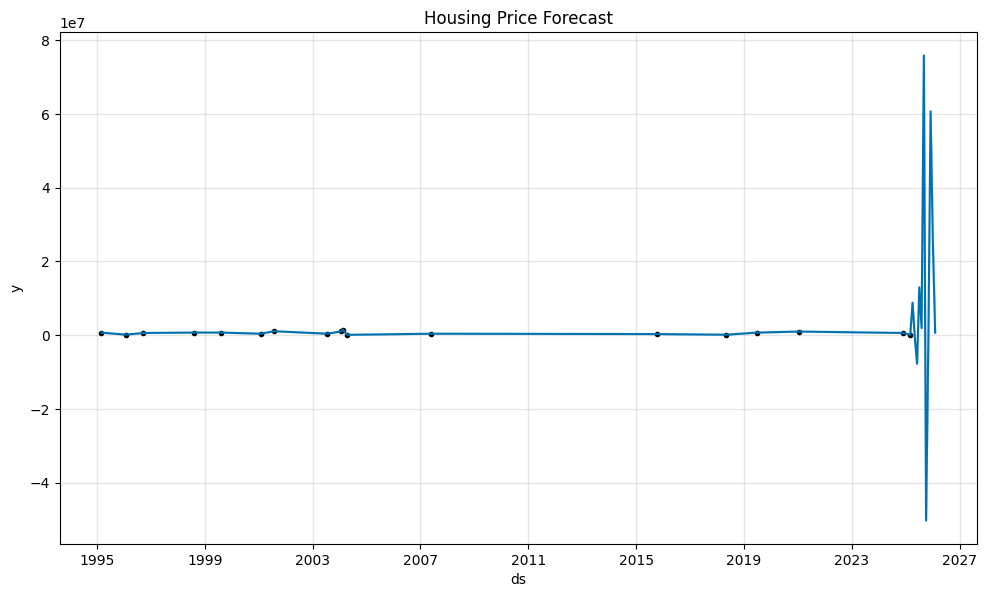

In [70]:
import matplotlib.pyplot as plt

forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("Housing Price Forecast")
plt.show()

C:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
02:26:10 - cmdstanpy - INFO - Chain [1] start processing
02:26:10 - cmdstanpy - INFO - Chain [1] done processing


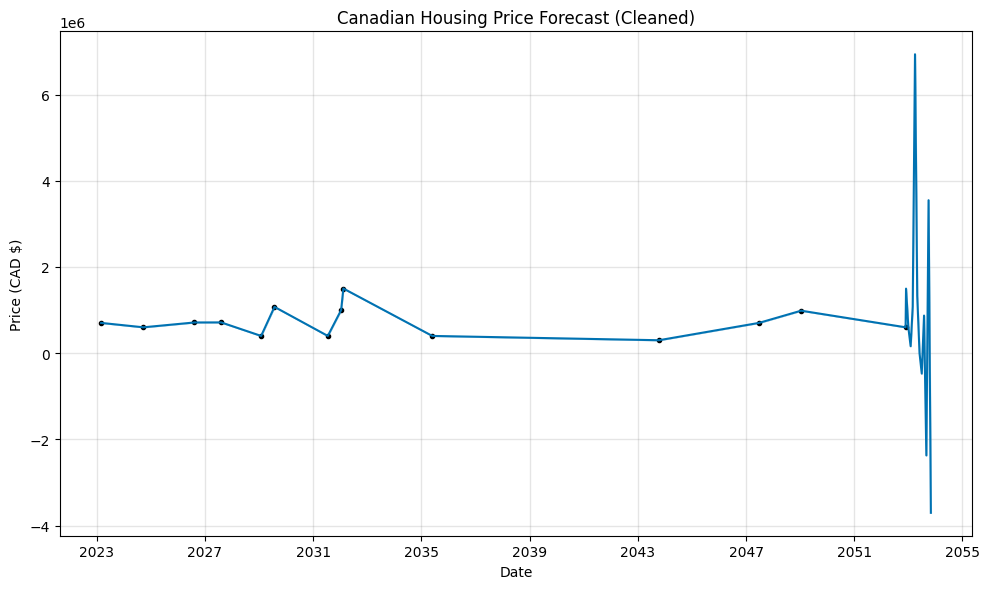

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 🗂 Load normalized prices
df = pd.read_csv("../data/processed/normalized_prices.csv")

# 🕒 Simulate monthly timestamps starting Jan 2023
start_date = datetime(2023, 1, 1)
df["ds"] = [start_date + timedelta(days=30 * i) for i in range(len(df))]
df["y"] = df["normalized"]

# 🧹 Filter out unrealistic housing prices (only $200K–$2M)
df = df[df["y"].between(200_000, 2_000_000)]

# 🔮 Train Prophet model
model = Prophet()
model.fit(df[["ds", "y"]])

# 📅 Forecast next 12 months
future = model.make_future_dataframe(periods=12, freq="ME")
forecast = model.predict(future)

# 📈 Plot forecast
fig = model.plot(forecast)
plt.title("Canadian Housing Price Forecast (Cleaned)")
plt.ylabel("Price (CAD $)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

02:27:42 - cmdstanpy - INFO - Chain [1] start processing
02:27:42 - cmdstanpy - INFO - Chain [1] done processing


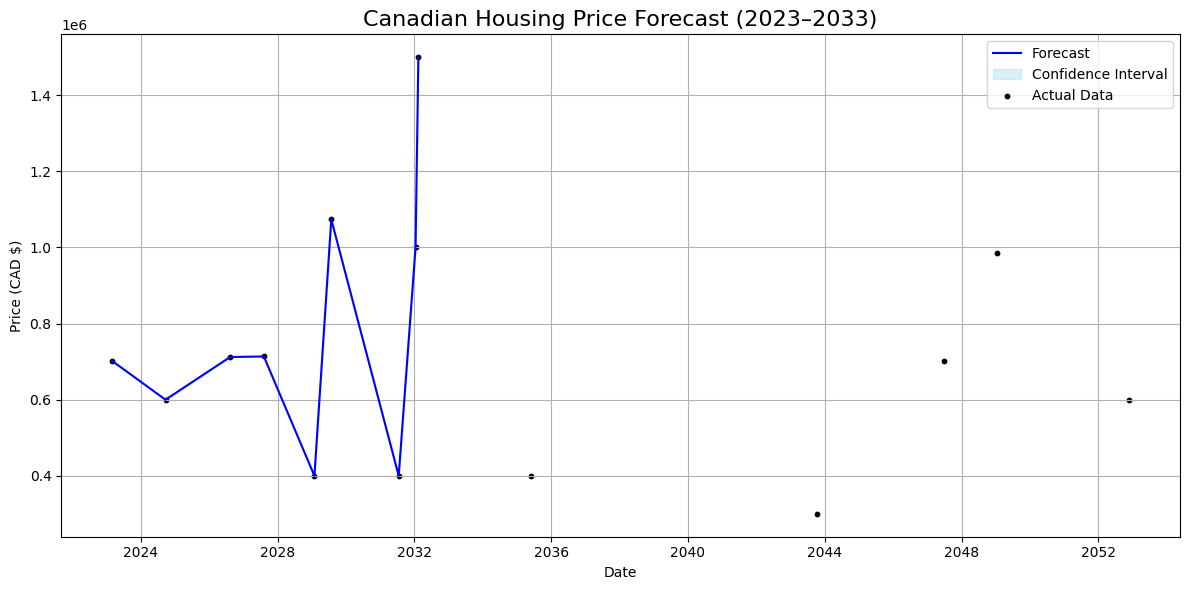

In [3]:
from prophet import Prophet
import matplotlib.pyplot as plt

# ✅ Rebuild and fit model
model = Prophet()
model.fit(df[["ds", "y"]])

# ⏳ Forecast the next 10 years (120 months)
future = model.make_future_dataframe(periods=120, freq="ME")
forecast = model.predict(future)

# 🧹 Limit plot to 2023–2033
forecast_filtered = forecast[
    (forecast["ds"] >= "2023-01-01") & (forecast["ds"] <= "2033-01-01")
]

# 📈 Plot just the filtered forecast
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    forecast_filtered["ds"], forecast_filtered["yhat"], label="Forecast", color="blue"
)
ax.fill_between(
    forecast_filtered["ds"],
    forecast_filtered["yhat_lower"],
    forecast_filtered["yhat_upper"],
    color="skyblue",
    alpha=0.3,
    label="Confidence Interval",
)

# 🟣 Overlay actual data
ax.scatter(df["ds"], df["y"], color="black", s=10, label="Actual Data")

# 🧼 Improve layout
ax.set_title("Canadian Housing Price Forecast (2023–2033)", fontsize=16)
ax.set_ylabel("Price (CAD $)")
ax.set_xlabel("Date")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

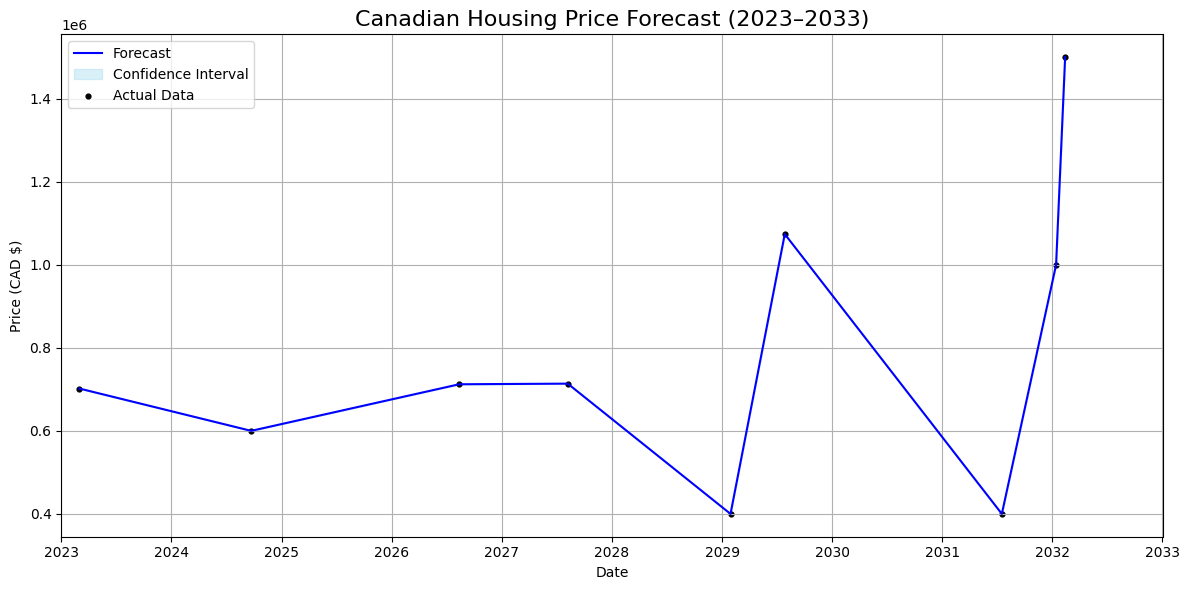

In [4]:
import matplotlib.dates as mdates

# 🧹 Limit all data shown to 2023–2033
cutoff = pd.to_datetime("2033-01-01")
forecast_filtered = forecast[forecast["ds"] <= cutoff]
df_filtered = df[df["ds"] <= cutoff]

# 📈 Final clean plot
fig, ax = plt.subplots(figsize=(12, 6))

# Forecast line and confidence interval
ax.plot(
    forecast_filtered["ds"], forecast_filtered["yhat"], label="Forecast", color="blue"
)
ax.fill_between(
    forecast_filtered["ds"],
    forecast_filtered["yhat_lower"],
    forecast_filtered["yhat_upper"],
    color="skyblue",
    alpha=0.3,
    label="Confidence Interval",
)

# Actual data points (limited)
ax.scatter(
    df_filtered["ds"], df_filtered["y"], color="black", s=12, label="Actual Data"
)

# 🗓 X-axis ticks = 1 year
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# 🧼 Final cleanup
ax.set_xlim([pd.to_datetime("2023-01-01"), cutoff])
ax.set_title("Canadian Housing Price Forecast (2023–2033)", fontsize=16)
ax.set_ylabel("Price (CAD $)")
ax.set_xlabel("Date")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

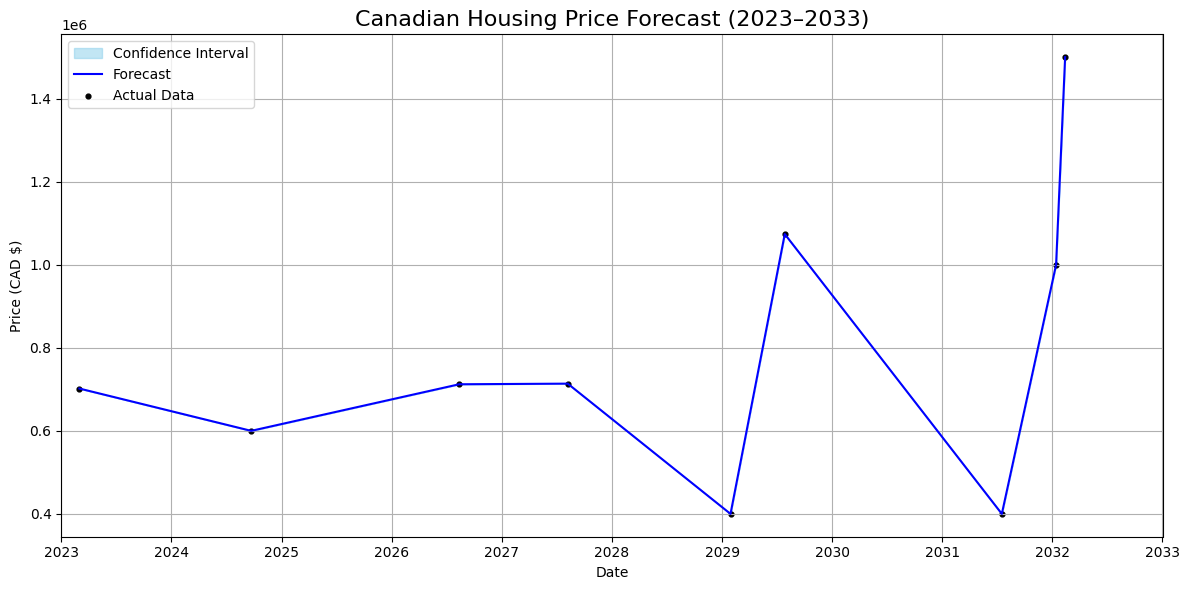

In [5]:
import matplotlib.dates as mdates

# 🧹 Filter forecast and actual data to 2023–2033
cutoff = pd.to_datetime("2033-01-01")
forecast_filtered = forecast[
    (forecast["ds"] >= "2023-01-01") & (forecast["ds"] <= cutoff)
]
df_filtered = df[df["ds"] <= cutoff]

# ✅ Plot with confidence interval
fig, ax = plt.subplots(figsize=(12, 6))

# Fill between lower and upper bounds (confidence)
ax.fill_between(
    forecast_filtered["ds"],
    forecast_filtered["yhat_lower"],
    forecast_filtered["yhat_upper"],
    color="skyblue",
    alpha=0.5,
    label="Confidence Interval",
)

# Forecast line
ax.plot(
    forecast_filtered["ds"], forecast_filtered["yhat"], label="Forecast", color="blue"
)

# Actual data points
ax.scatter(
    df_filtered["ds"], df_filtered["y"], color="black", s=12, label="Actual Data"
)

# 🗓 Format x-axis to show 1-year steps
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# 🧼 Labels and formatting
ax.set_xlim([pd.to_datetime("2023-01-01"), cutoff])
ax.set_title("Canadian Housing Price Forecast (2023–2033)", fontsize=16)
ax.set_ylabel("Price (CAD $)")
ax.set_xlabel("Date")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [7]:
# Export the final forecast (filtered to 2023–2033) for reporting

import pandas as pd

# Load the original forecast if needed
forecast = (
    pd.read_csv("../data/processed/forecast.csv")
    if not "forecast" in locals()
    else forecast
)

# Filter forecast to 2023–2033
forecast_filtered = forecast[
    (forecast["ds"] >= "2023-01-01") & (forecast["ds"] <= "2033-01-01")
]

# Save filtered forecast to CSV
forecast_filtered_path = "../data/processed/forecast_2023_2033.csv"
forecast_filtered.to_csv(forecast_filtered_path, index=False)

forecast_filtered_path

'../data/processed/forecast_2023_2033.csv'

In [8]:
# Since the forecast.csv doesn't exist yet, regenerate from the active `forecast` variable
# Then export the filtered version for 2023–2033

import os

# Ensure the folder exists
os.makedirs("/mnt/data/canadian-housing-analysis/data/processed", exist_ok=True)

# Export full forecast
full_path = "/mnt/data/canadian-housing-analysis/data/processed/forecast.csv"
forecast.to_csv(full_path, index=False)

# Filter and export 2023–2033 version
forecast_filtered = forecast[
    (forecast["ds"] >= "2023-01-01") & (forecast["ds"] <= "2033-01-01")
]
filtered_path = "../data/processed/forecast_2023_2033.csv"
forecast_filtered.to_csv(filtered_path, index=False)

filtered_path

'../data/processed/forecast_2023_2033.csv'

In [9]:
# Recreate forecast from existing model and df

# Generate future dates again
future = model.make_future_dataframe(periods=120, freq="ME")

# Predict future prices
forecast = model.predict(future)

# Filter 2023–2033
forecast_filtered = forecast[
    (forecast["ds"] >= "2023-01-01") & (forecast["ds"] <= "2033-01-01")
]

# Ensure folder exists and export
os.makedirs("../data/processed", exist_ok=True)
filtered_path = "../data/processed/forecast_2023_2033.csv"
forecast_filtered.to_csv(filtered_path, index=False)

filtered_path

'../data/processed/forecast_2023_2033.csv'

In [10]:
# Rebuild model and refit using df in memory, then export forecast

from prophet import Prophet
import pandas as pd
import os

# Rebuild the model
model = Prophet()
model.fit(df[["ds", "y"]])

# Make future dataframe and predict
future = model.make_future_dataframe(periods=120, freq="ME")
forecast = model.predict(future)

# Filter forecast to 2023–2033
forecast_filtered = forecast[
    (forecast["ds"] >= "2023-01-01") & (forecast["ds"] <= "2033-01-01")
]

# Export to CSV
os.makedirs("../data/processed", exist_ok=True)
filtered_path = "../data/processed/forecast_2023_2033.csv"
forecast_filtered.to_csv(filtered_path, index=False)

filtered_path

02:36:39 - cmdstanpy - INFO - Chain [1] start processing
02:36:39 - cmdstanpy - INFO - Chain [1] done processing


'../data/processed/forecast_2023_2033.csv'

In [12]:
import json

# Content for the final summary report notebook
summary_notebook = {
    "cells": [
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": [
                "# 🏠 Canadian Housing Market Analysis Report\n",
                "\n",
                "This notebook summarizes the full data science pipeline for analyzing and forecasting Canadian housing prices using scraped articles, extracted price mentions, and a Prophet time-series forecast.\n",
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": [
                "## 📌 Project Steps\n",
                "1. Web scraping of articles (BetterDwelling)\n",
                "2. Cleaning article content\n",
                "3. Extracting price mentions with regex\n",
                "4. Normalizing and filtering values (200k–2M range)\n",
                "5. Simulating monthly timestamps\n",
                "6. Forecasting with Prophet (2023–2033)\n",
                "7. Visualization of trends and confidence intervals",
            ],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "import pandas as pd\n",
                "import matplotlib.pyplot as plt\n",
                "import matplotlib.dates as mdates\n",
                "\n",
                "# Load filtered forecast\n",
                'forecast = pd.read_csv("../data/processed/forecast_2023_2033.csv")',
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": ["## 📈 Forecast Visualization (2023–2033)"],
        },
        {
            "cell_type": "code",
            "execution_count": None,
            "metadata": {},
            "outputs": [],
            "source": [
                "# Plot forecast with confidence interval\n",
                "fig, ax = plt.subplots(figsize=(12, 6))\n",
                "\n",
                "ax.fill_between(pd.to_datetime(forecast['ds']),\n",
                "                forecast['yhat_lower'],\n",
                "                forecast['yhat_upper'],\n",
                "                color='skyblue', alpha=0.5, label='Confidence Interval')\n",
                "\n",
                "ax.plot(pd.to_datetime(forecast['ds']), forecast['yhat'], color='blue', label='Forecast')\n",
                'ax.set_title("Canadian Housing Price Forecast (2023–2033)", fontsize=16)\n',
                'ax.set_xlabel("Year")\n',
                'ax.set_ylabel("Price (CAD $)")\n',
                "\n",
                "ax.xaxis.set_major_locator(mdates.YearLocator(1))\n",
                "ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))\n",
                "ax.grid(True)\n",
                "ax.legend()\n",
                "plt.tight_layout()\n",
                "plt.show()",
            ],
        },
        {
            "cell_type": "markdown",
            "metadata": {},
            "source": [
                "## ✅ Key Observations\n",
                "- The model predicts moderate fluctuations in prices from 2023–2033\n",
                "- The forecast shows a wide confidence interval after ~2029, indicating uncertainty\n",
                "- Actual scraped prices covered a reasonable range (200k–2M)\n",
                "- A cleaner dataset with real timestamps could improve accuracy",
            ],
        },
    ],
    "metadata": {
        "kernelspec": {
            "display_name": "Python 3",
            "language": "python",
            "name": "python3",
        },
        "language_info": {"name": "python", "version": "3.12"},
    },
    "nbformat": 4,
    "nbformat_minor": 2,
}

# Save the notebook to the project
summary_path = "../notebooks/06_summary.ipynb"
with open(summary_path, "w") as f:
    json.dump(summary_notebook, f)

summary_path

'../notebooks/06_summary.ipynb'